## Steps of Intended Approach To Building The Required Model
- **Data Collection**
- **Quality Checks**
- **Exploratory Data Analysis**
    - Data Cleaning
    - Categorical Variables Analysis
    - Numerical Variables Analysis
- **Identifying Categorical Variables and Creating Dummy Variables**
- **Model Building Using Logistic Regression**
    - Splitting The Dataset
    - Re-scaling 
    - Model Building Using RFE and Statsmodels
    - Deriving Probabilities and Lead Score
    - Confusion Matrix
    - Optimal Cut-OFF
    - Plotting ROC Curve
- **Predictions On Test Dataset**
    - Re-scaling
    - Making Predictions
    - Confusion Matrix
- **Speculation**

## Importing the required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
clr = sns.color_palette()

## Reading the data file

In [4]:
df = pd.read_csv('Leads.csv')

In [5]:
# Checking the top rows to look at the data

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Size of the data frame

df.shape

(9240, 37)

In [7]:
# To display all the rows and columns - Decompress the data frame

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None) 

In [8]:
# Details of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Statistical details of data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Checking percentage of null values

100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Check for duplicates

df.duplicated().sum() 

0

### Insights

- There are no duplicates in the data file
- Many columns have alot of null values
- As per problem statement the categorical value 'Select' needs to be handled
- Prospect ID and Lead Number are for the same purpose and this needs to be handled

## Exploratory Data Analysis

### Data Cleaning

In [12]:
#Dropping Prospect ID

df1 = df.drop('Prospect ID', axis = 1)

In [13]:
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
#Replacing Select Category with null value as per problem statement

df1 = df1.replace('Select', np.nan)

In [15]:
# Information on data frame after replacing with null values

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Checking for percentage of null values after replace of Select with null

100*df1.isnull().mean()

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

## Dropping columns with more than 40% null values

In [17]:
cut_off = 40
cols_to_drop = list(df1.columns[100*df1.isnull().mean()>cut_off])
print(cols_to_drop)
print("No of columns to drop:" ,len(cols_to_drop))

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
No of columns to drop: 7


In [18]:
df2 = df1.drop(cols_to_drop, axis = 1)

In [19]:
df2.shape

(9240, 29)

In [20]:
#checking the count of unique values

df2.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [21]:
# Checking for percentage of null values after dropping columns with more than 40% null

100*df2.isnull().mean()

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

## Data Visualisation

In [22]:
df2['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

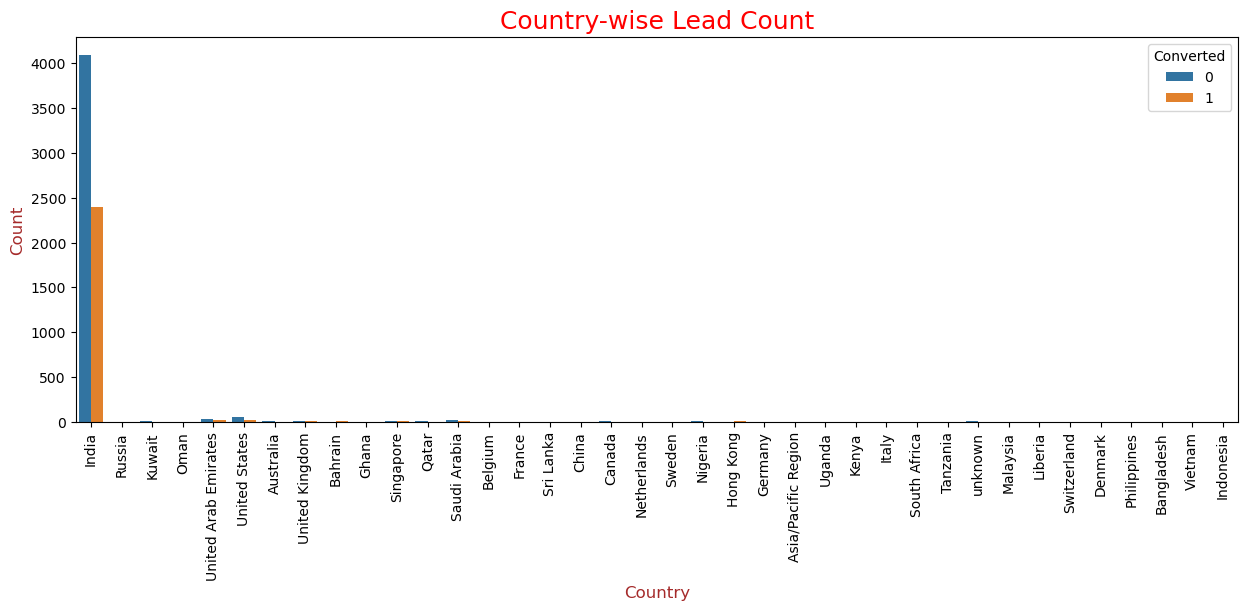

In [23]:
# setting the plot size

plt.figure(figsize = (15,5)) 

# Count plot to check Country column
sns.countplot(data = df2, x = df2.Country, hue = df2.Converted)

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Country-wise Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Country", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

### India is the most tagged country, the above graph represents that the data is skewed

- Dropping the column as it does not make an impact

In [24]:
# Drop Country Column

df2 = df2.drop('Country', axis = 1)

In [25]:
df2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [26]:
# Checking values counts including null values to decide on imputation

df2['Specialization'].value_counts(dropna = False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [27]:
# Imputing null values with Missing as the data is not available

df2['Specialization'] = df2['Specialization'].replace(np.nan, 'Missing')

In [28]:
#Checking value count after imputing null values

df2['Specialization'].value_counts()

Specialization
Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [29]:
### There are many sub categories for Management. Combining Management specializations into one

df2['Specialization'] = df2['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management')

In [30]:
#Checking Value counts after combining sub categories

df2['Specialization'].value_counts()

Specialization
Management                           4253
Missing                              3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

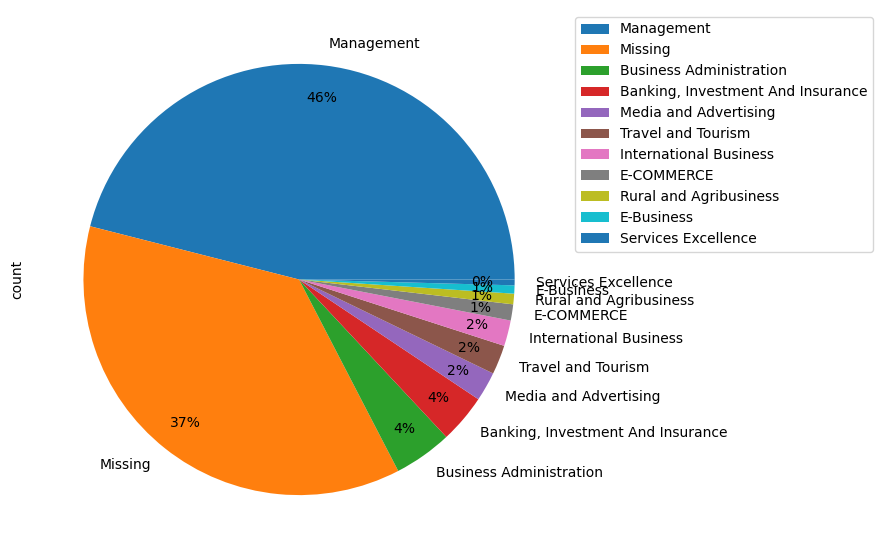

In [31]:
plt.figure(figsize = (15,7))
df2['Specialization'].value_counts().plot.pie(autopct='%.0f%%', pctdistance=0.85)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

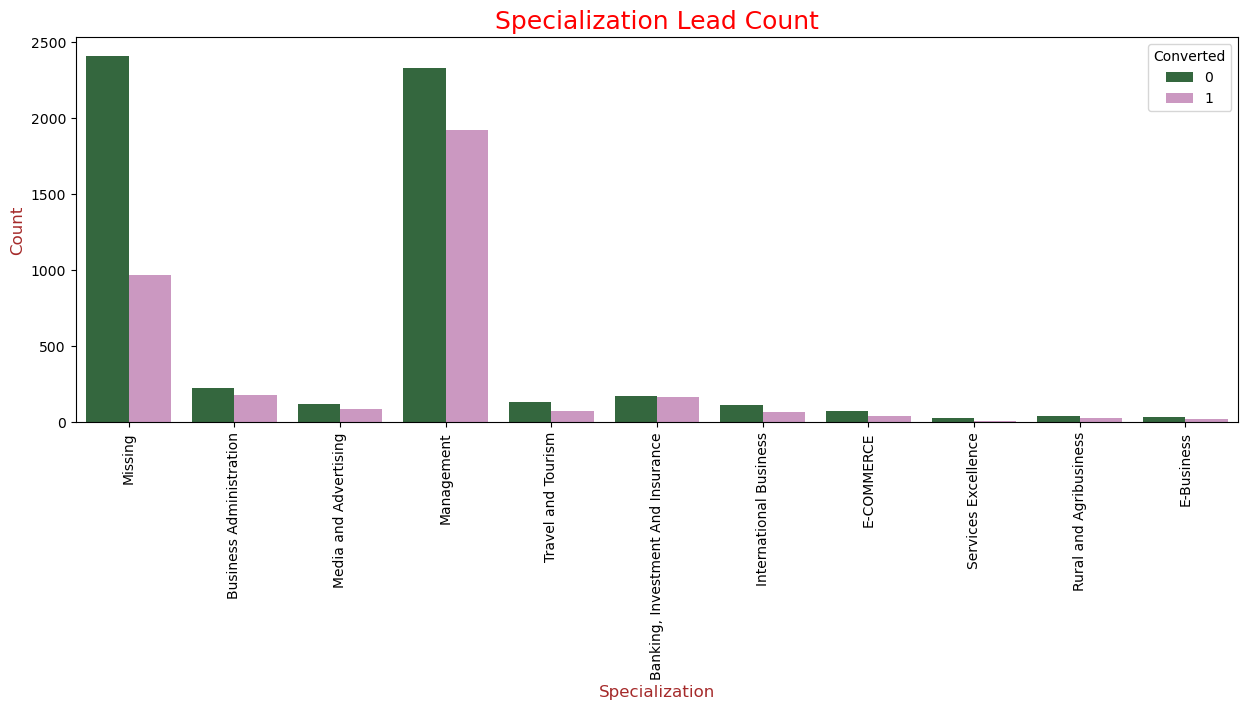

In [32]:
# Plot for Specialization based on Coversion


plt.figure(figsize = (15,5)) 

# Count plot to check Specialization column
sns.countplot(data = df2, x = df2.Specialization, hue = df2.Converted, palette = 'cubehelix')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Specialization Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Specialization", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Management is the specialization that has the highest conversion
-This column needs to remain

In [33]:
# Checking value counts including null values

df2['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [34]:
# Imputing null values with Unemployed as it is the most

df2['What is your current occupation'] = df2['What is your current occupation'].replace(np.nan, 'Unemployed')

In [35]:
# Checking values after imputing null values

df2['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

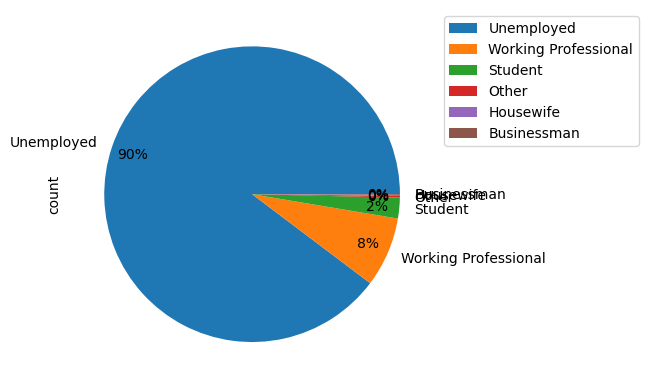

In [36]:
df2['What is your current occupation'].value_counts().plot.pie(autopct='%.0f%%', pctdistance=0.85)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

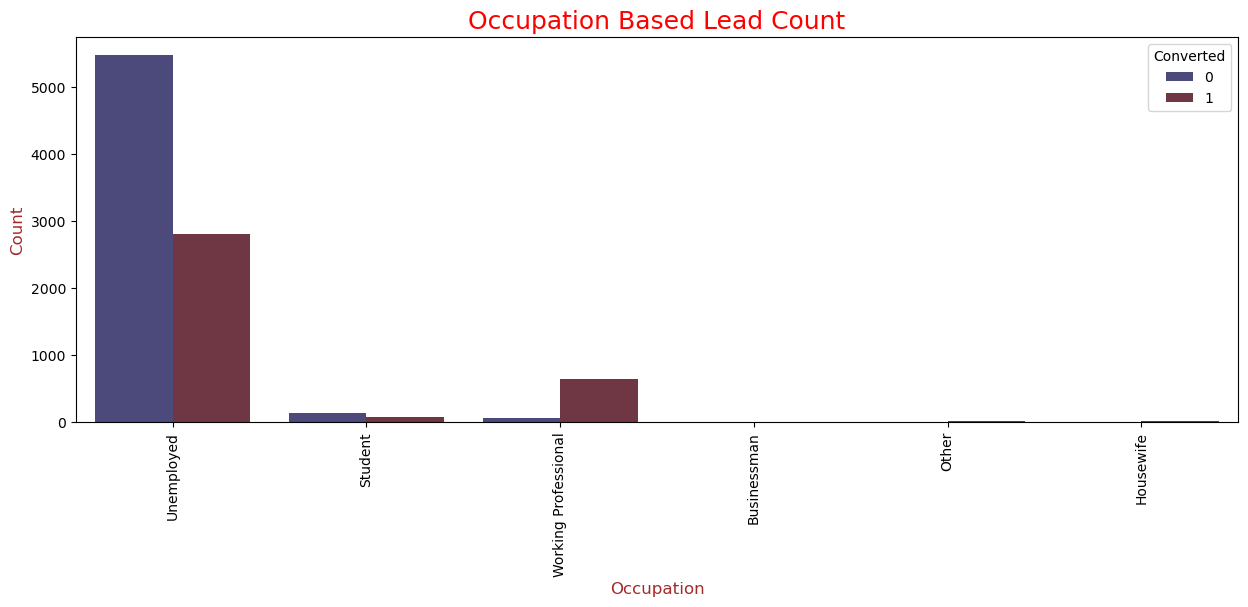

In [37]:
# Plot for Occupation based on Coversion

plt.figure(figsize = (15,5)) 

# Count plot to check Occupation column
sns.countplot(data = df2, x = df2['What is your current occupation'], hue = df2.Converted, palette = 'icefire')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Occupation Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Occupation", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Insights

- Unemployed seems to submit more inquires(leads)
- Working professionals are highly to opt for the course


In [38]:
# Checking value counts including null values 

df2['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [39]:
# Imputing null values with Better Career Prospects as it the most appearing

df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [40]:
# Checking value counts after imputing null values

df2['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

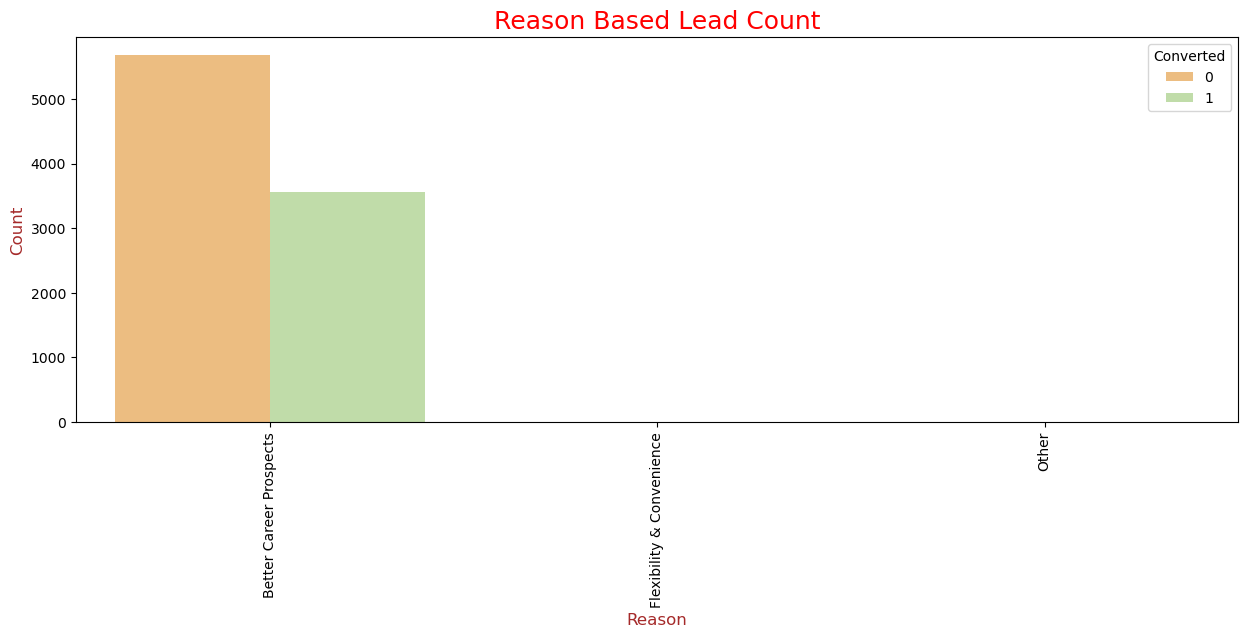

In [41]:
# Plot for Reason based on Coversion

plt.figure(figsize = (15,5)) 

# Count plot to check Reason column
sns.countplot(data = df2, x = df2['What matters most to you in choosing a course'], hue = df2.Converted, palette = 'Spectral')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Reason Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Reason", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Insights

- Imputing makes the data skewed
- This column can be removed

In [42]:
# Checking value counts including null values 

df2['Tags'].value_counts(dropna = False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [43]:
#Imputing null with Not Specified

df2['Tags'] = df2['Tags'].replace(np.nan, 'Not Specified')

In [44]:
#Checking values counts after imputing

df2['Tags'].value_counts(dropna = False)

Tags
Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

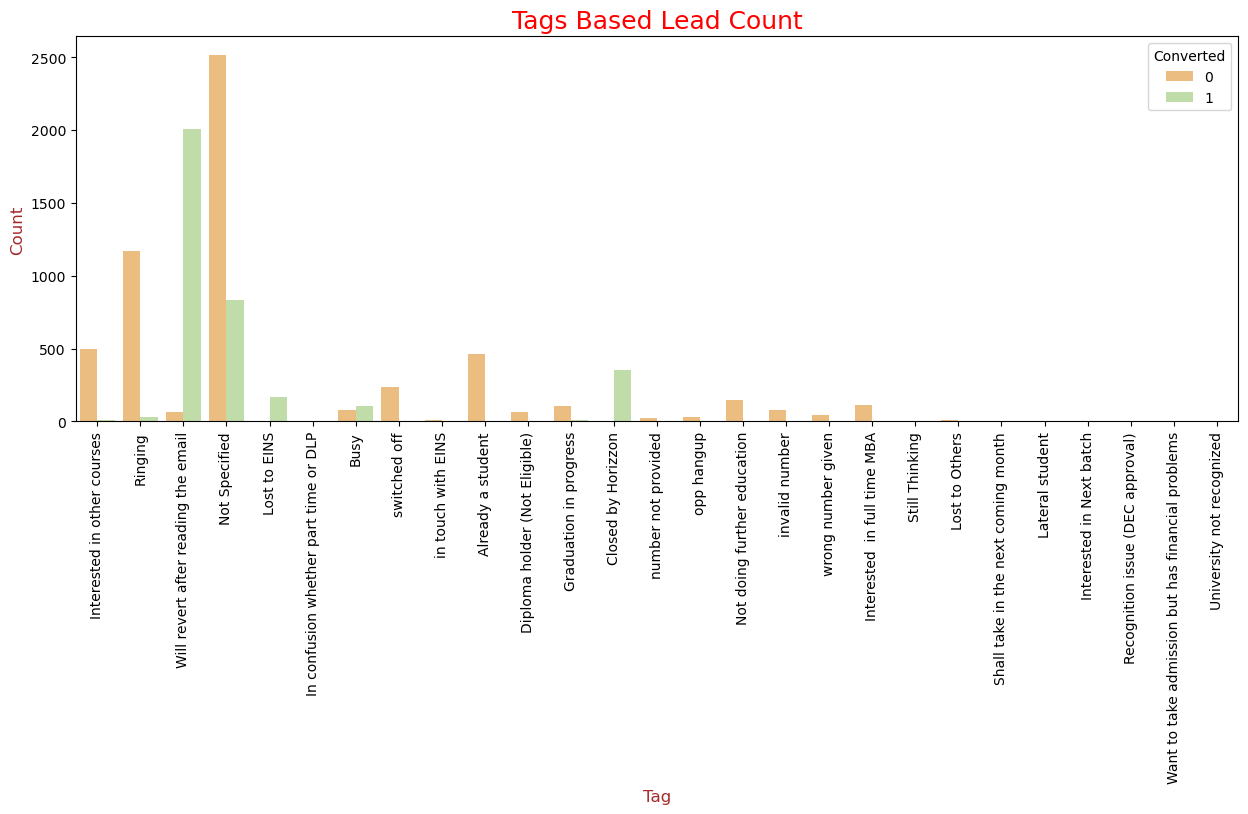

In [45]:
# Plot for Tags based on Coversion


plt.figure(figsize = (15,5)) 

# Count plot to check Tags column
sns.countplot(data = df2, x = df2['Tags'], hue = df2.Converted, palette = 'Spectral')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Tags Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Tag", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

In [46]:
# Dropping Tags as it is not impacting the analysis

df2 = df2.drop('Tags', axis = 1)

In [47]:
# Dropping the reasons column as it makes the data skewed

df2 = df2.drop('What matters most to you in choosing a course', axis = 1)

In [48]:
# Checking value counts including null values 

df2['City'].value_counts(dropna = False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [49]:
df2['City'].mode()

0    Mumbai
Name: City, dtype: object

In [50]:
#Imputing null with Mumbai as it is the most

df2['City'] = df2['City'].replace(np.nan, 'Mumbai')

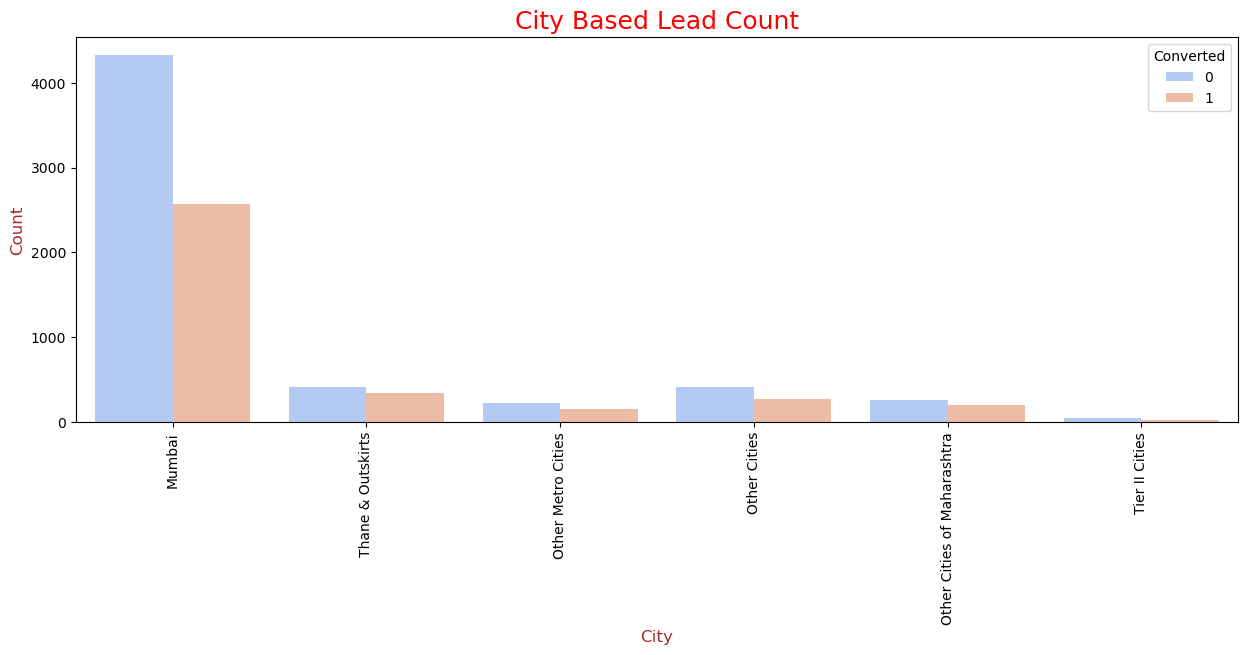

In [51]:
# Plot for City based on Coversion


plt.figure(figsize = (15,5)) 

# Count plot to check City column
sns.countplot(data = df2, x = df2['City'], hue = df2.Converted, palette = 'coolwarm')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('City Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("City", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

In [52]:
#Dropping City as it makes the data skewed

df2 = df2.drop('City', axis = 1)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9204 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9103 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9103 non-null   float64
 9   Last Activity                             9137 non-null   object 
 10  Specialization                      

In [54]:
100*df2.isnull().mean()

Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [55]:
# Checking value counts including null values

df2['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [56]:
#There are two columns Google and google
df2['Lead Source'] = df2['Lead Source'].replace('google', 'Google')

#There are just two values for Social Media, henc echanging to Facebook
df2['Lead Source'] = df2['Lead Source'].replace('Social Media', 'Facebook')

# There are many values with just 1 0r two counts, combining them as Others
df2['Lead Source'] = df2['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads','welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'Others' )


In [57]:
df2['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
NaN                   36
Others                21
Name: count, dtype: int64

In [58]:
# Replacing null with Others

df2['Lead Source'] = df2['Lead Source'].replace(np.nan, 'Others')

In [59]:
# Checking value counts after imputing null values

df2['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                57
Name: count, dtype: int64

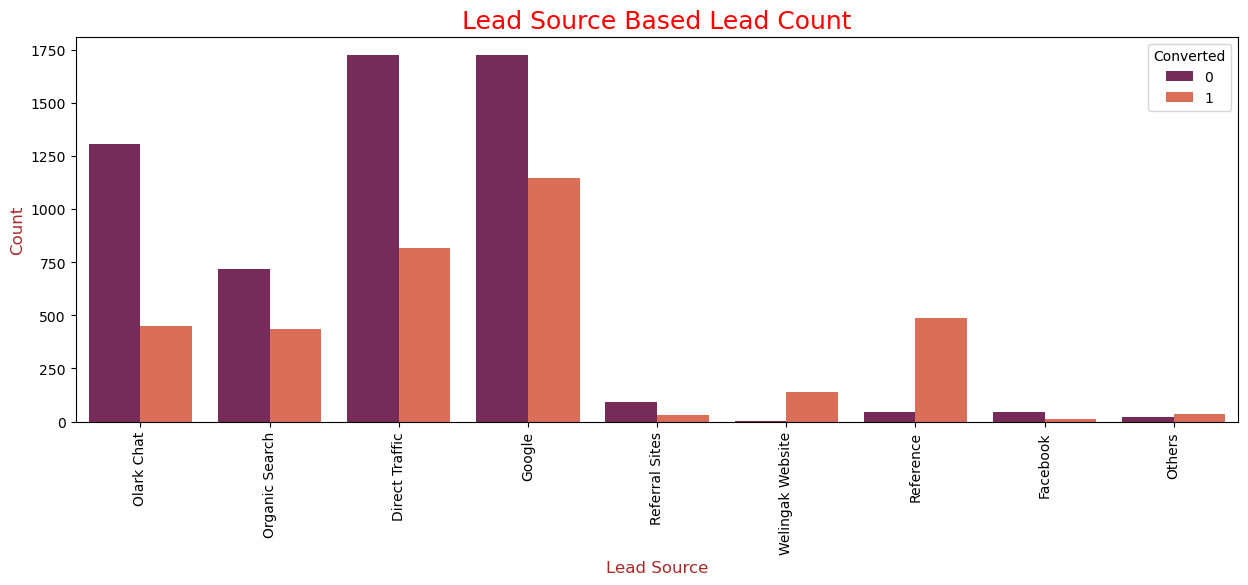

In [60]:
# Plot for Lead Source based on Coversion

plt.figure(figsize = (15,5)) 

# Count plot to check Lead Source column
sns.countplot(data = df2, x = df2['Lead Source'], hue = df2.Converted, palette = 'rocket')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Lead Source Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Lead Source", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Insight

- Google and Direct Traffic generates highest number of leads
- Reference and Welingak has higher conversion rate. We can maximise leads from these sources
- Campaigning using the Chat system, Google and direct site may increase the number of leads

In [61]:
# Checking vallue counts including null

df2['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [62]:
# Since many values have minimal counts, combining them into one as Others

df2['Last Activity'] = df2['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

In [63]:
# Imputing null values using Others

df2['Last Activity'] = df2['Last Activity'].replace(np.nan, 'Others')

In [64]:
# Checking value counts after imputing null values

df2['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

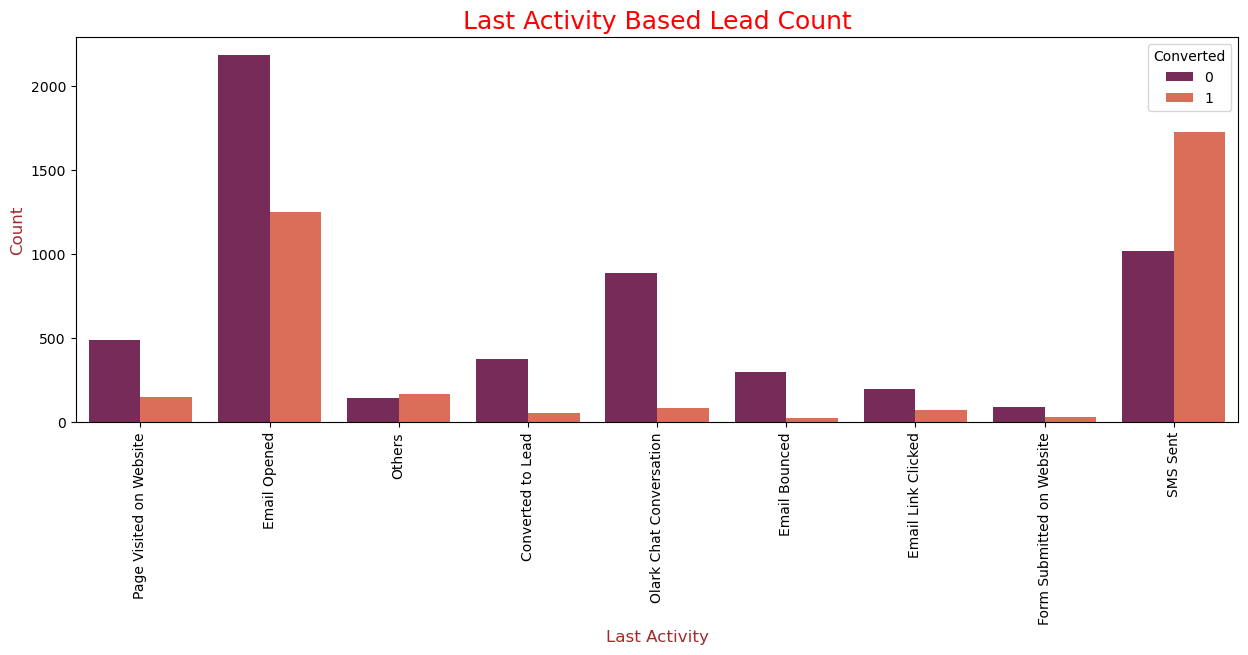

In [65]:
# Plot for Last Activity based on Coversion

plt.figure(figsize = (15,5)) 

# Count plot to check Last Activity column
sns.countplot(data = df2, x = df2['Last Activity'], hue = df2.Converted, palette = 'rocket')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Last Activity Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Last Activity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Insights

- Olark Chat and Emails generate more leads
- SMS has more lead conversion
- We can concentrate on converting Olark Chat and Email leads
- We can concentrate on generating more leads via SMS

In [66]:
100*df2.isnull().mean()

Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [67]:
# We can drop null values that are less

df2 = df2.dropna()

In [68]:
#Checking if dropna has worked

100*df2.isnull().mean()

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [69]:
# Checking vallue counts including null

df2['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

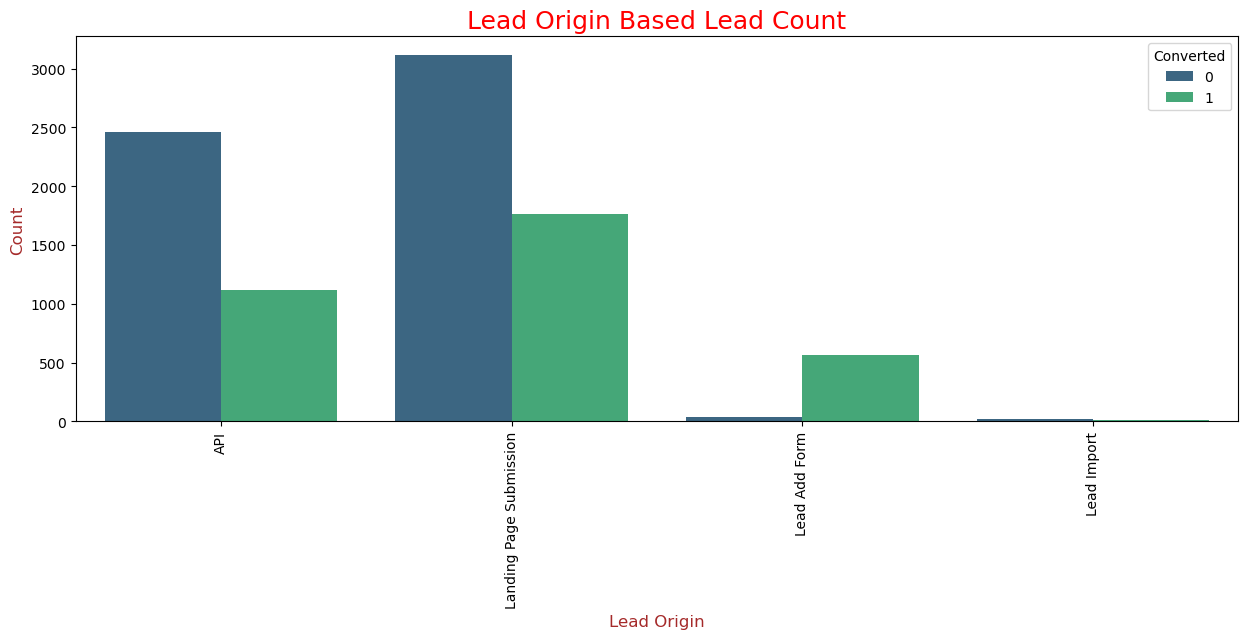

In [70]:
# Plot for Last Activity based on Coversion

plt.figure(figsize = (15,5)) 

# Count plot to check Lead origin column
sns.countplot(data = df2, x = df2['Lead Origin'], hue = df2.Converted, palette = 'viridis')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Lead Origin Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Lead Origin", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Insights

- API and Landing page Submission generates more number of leads and also converts good number of leads
- Lead add form generates less leads but has higher conversion rate
- We can concentrate on generating leads through Lead Add Form

In [71]:
# Checking values counts including null

df2['Last Notable Activity'].value_counts(dropna = False)

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [72]:
df2['Last Notable Activity'] = df2['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others')

In [73]:
df2['Last Notable Activity'].value_counts(dropna = False)

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: count, dtype: int64

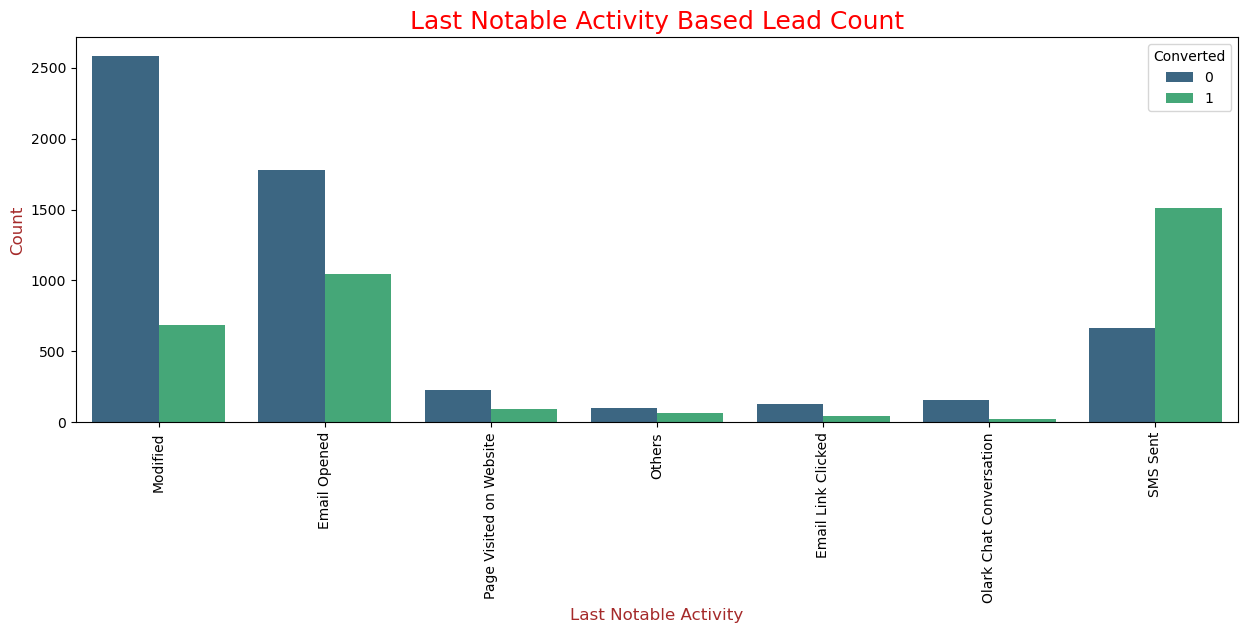

In [74]:
# Plot for Last Notable Activity based on Coversion

plt.figure(figsize = (15,5)) 

# Count plot to check Lead origin column
sns.countplot(data = df2, x = df2['Last Notable Activity'], hue = df2.Converted, palette = 'viridis')

# Rotating the ticks to display country names fine
plt.xticks(rotation=90)

# Title of the plot
plt.title('Last Notable Activity Based Lead Count', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Last Notable Activity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show()

## Insights

- Conversion is higher when SMS is sent
- Modified method seems to generate more leads
- Since SMS conversion is higher, we need to concentrtate on generating more leads through this method

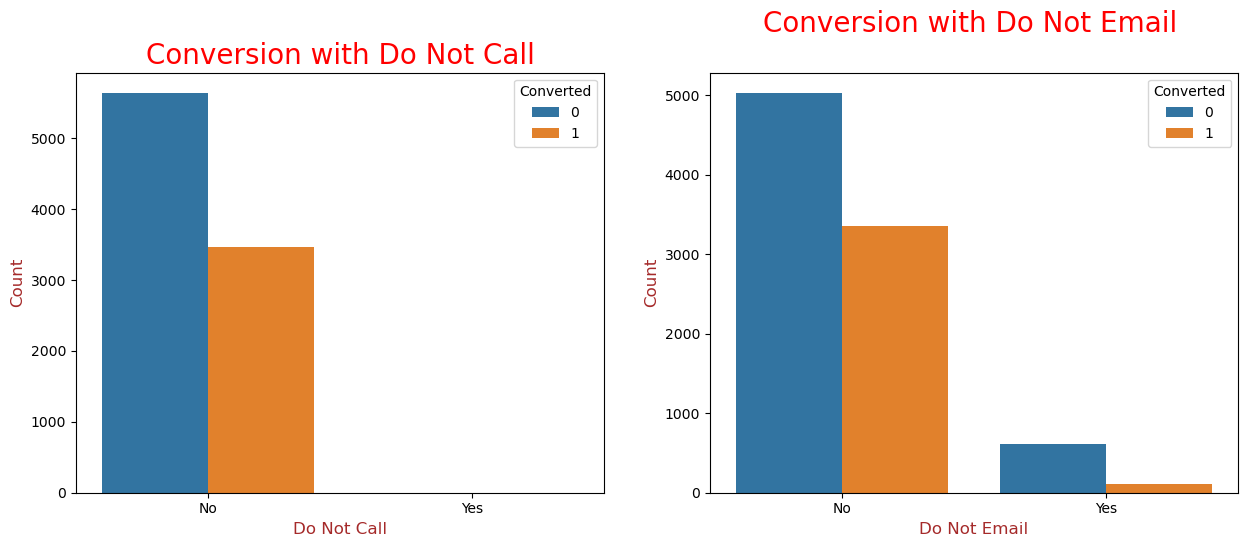

In [75]:
# Subplots for  Do Not Call and Do Not Email

plt.figure(figsize = [15,12])
plt.subplot(2,2,1)
sns.countplot(x = df2['Do Not Call'], hue = df2['Converted'])
plt.title('Conversion with Do Not Call', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Do Not Call", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.subplot(2,2,2)
sns.countplot(x = df2['Do Not Email'], hue = df2['Converted'])
plt.title('Conversion with Do Not Email \n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Do Not Email", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )
plt.show()

In [76]:
# We can drop Do Not Call variable as it is skewed with No

df2 = df2.drop('Do Not Call', axis = 1)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9103 non-null   int64  
 1   Lead Origin                               9103 non-null   object 
 2   Lead Source                               9103 non-null   object 
 3   Do Not Email                              9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Specialization                            9103 non-null   object 
 10  What is your current occupation          

In [78]:
other_columns = (['Search', 'Magazine', 'Newspaper Article',  'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                        'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'  ])

In [79]:
for col in other_columns:
    print(df2[col].value_counts(), '\n')

Search
No     9089
Yes      14
Name: count, dtype: int64 

Magazine
No    9103
Name: count, dtype: int64 

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64 

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64 

Newspaper
No     9102
Yes       1
Name: count, dtype: int64 

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64 

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64 

Receive More Updates About Our Courses
No    9103
Name: count, dtype: int64 

Update me on Supply Chain Content
No    9103
Name: count, dtype: int64 

Get updates on DM Content
No    9103
Name: count, dtype: int64 

I agree to pay the amount through cheque
No    9103
Name: count, dtype: int64 



## Insight

- All the columns have No category as maximum count, these coulmns can be dropped as they will not impact the analysis

In [80]:
df2 = df2.drop(other_columns, axis = 1)

In [81]:
df2.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
df2['A free copy of Mastering The Interview'].value_counts(dropna = False)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

In [83]:
num_cols = (['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'])

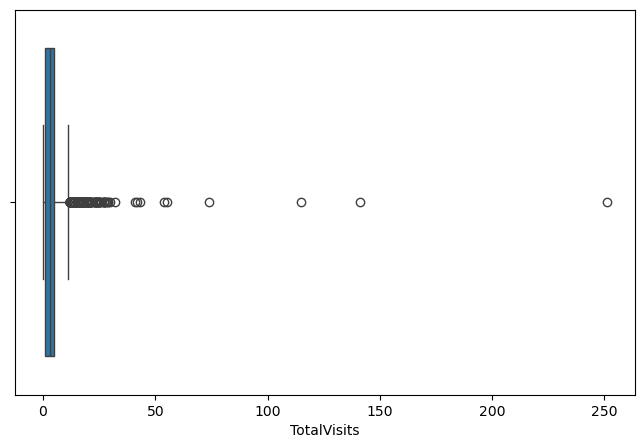

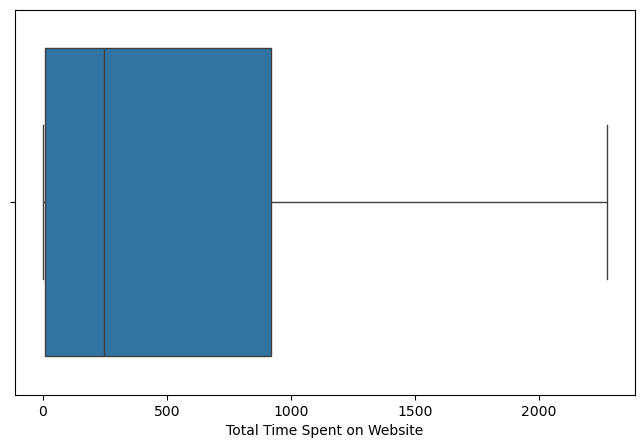

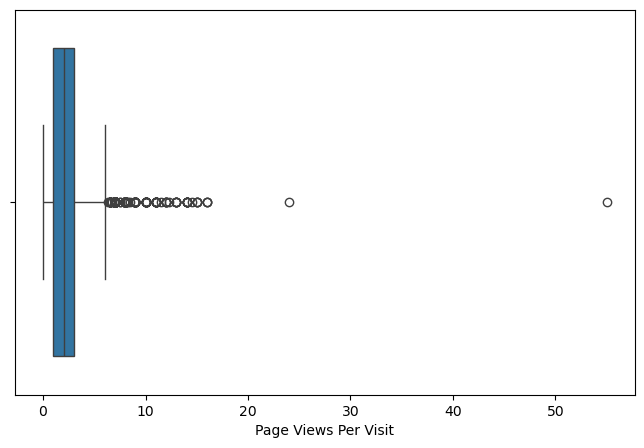

In [84]:
#using for loop to boxplot numerical coumns to check for outliers

for col in num_cols:
    plt.figure(figsize = (8,5))
    sns.boxplot(x=df2[col])
    plt.show()

## Insights

- Total time spent on Websites does not have any outliers
- Page Views per visit and Total Visits have outliers and these need to be handled

In [85]:
# using for loop to check statistical data to handle outliers 

for col in num_cols:
    print(df2[col].describe(), '\n')

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64 

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64 

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64 



In [86]:
#Removing the Oultiers from Total Visits


Q3 = df2['TotalVisits'].quantile(0.75)

df2 = df2[(df2['TotalVisits'] <= Q3)]

Q1 = df2['TotalVisits'].quantile(0.25)

data = df2[(df2['TotalVisits'] >= Q1)]

In [87]:
# Removing the outliers from Page Views Per Visit 

Q3 = df2['Page Views Per Visit'].quantile(0.75)

data = df2[(df2['Page Views Per Visit'] <= Q3)]

Q1 = df2['Page Views Per Visit'].quantile(0.25)

data = df2[(df2['Page Views Per Visit'] >= Q1)]

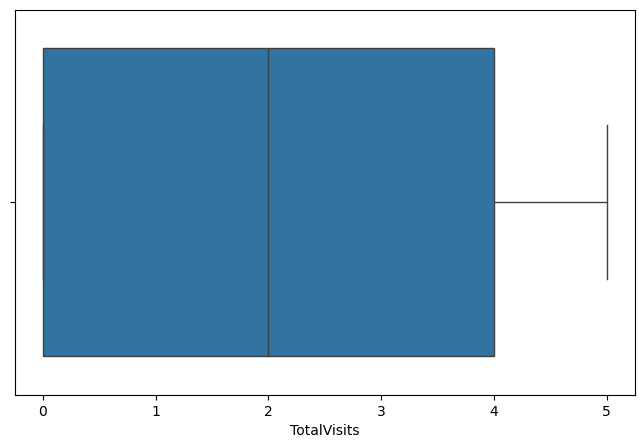

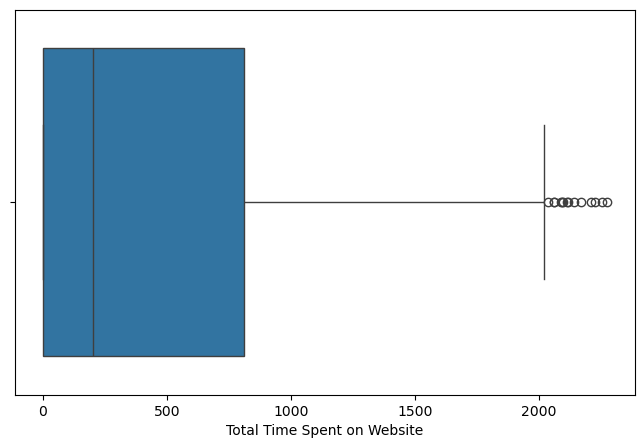

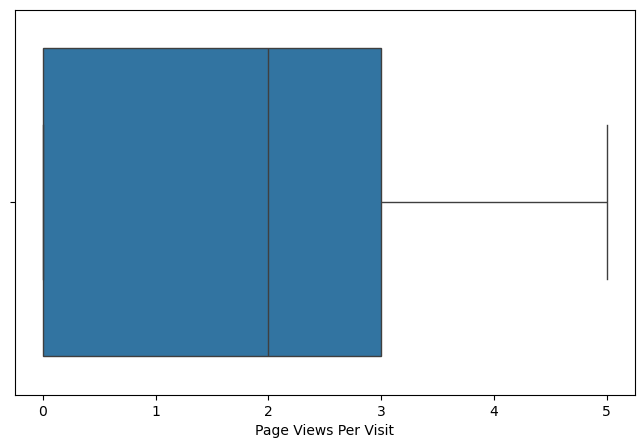

In [88]:
#Box Plot after removing outliers to check if it is handled

for col in num_cols:
    plt.figure(figsize = (8,5))
    sns.boxplot(x=df2[col])
    plt.show()

In [89]:
#Checking the shape of final data frame

df2.shape

(7473, 13)

In [90]:
# Check to confirm if no null values in final data frame

100*df2.isnull().mean()

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Correlation Matrix of numerical variables

In [91]:
nums_cols = (['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'])

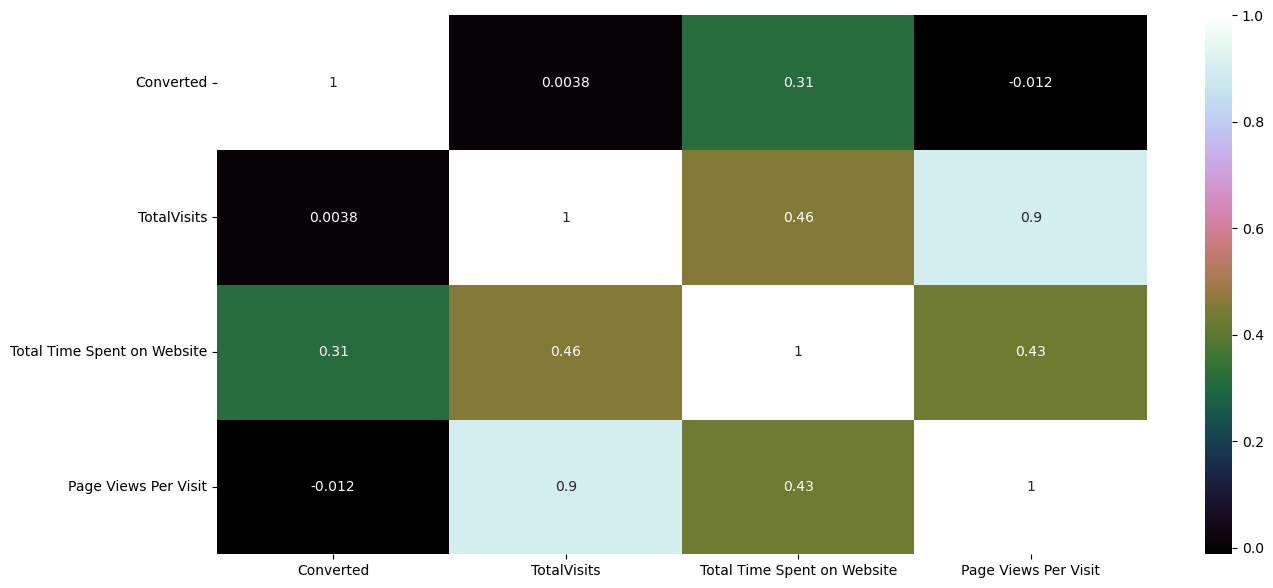

In [92]:
plt.figure(figsize = (15,7))
sns.heatmap(df2[nums_cols].corr(), cmap = 'cubehelix', annot = True)
plt.show()

## Creating dummy variables for categorical columns

In [93]:
df2.dtypes # checking the data types of columns to categorize

Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [94]:
cat_cols = df2.select_dtypes(include = ['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
for col in cat_cols:
    print(df2[col].value_counts(dropna = False), '\n')

Lead Origin
Landing Page Submission    3654
API                        3188
Lead Add Form               601
Lead Import                  30
Name: count, dtype: int64 

Lead Source
Google              2296
Direct Traffic      2062
Olark Chat          1723
Organic Search       674
Reference            438
Welingak Website     128
Referral Sites        74
Others                46
Facebook              32
Name: count, dtype: int64 

Do Not Email
No     6879
Yes     594
Name: count, dtype: int64 

Last Activity
Email Opened                 2758
SMS Sent                     2275
Olark Chat Conversation       903
Converted to Lead             412
Page Visited on Website       365
Email Bounced                 284
Email Link Clicked            228
Others                        151
Form Submitted on Website      97
Name: count, dtype: int64 

Specialization
Management                           3285
Missing                              3043
Business Administration               303
Banking, Inve

In [96]:
# List of variables to map to binary values

varlist =  ['A free copy of Mastering The Interview', 'Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df2[varlist] = df2[varlist].apply(binary_map)

In [97]:
#checking value counts to see binary map

for col in cat_cols:
    print(df2[col].value_counts(dropna = False), '\n')

Lead Origin
Landing Page Submission    3654
API                        3188
Lead Add Form               601
Lead Import                  30
Name: count, dtype: int64 

Lead Source
Google              2296
Direct Traffic      2062
Olark Chat          1723
Organic Search       674
Reference            438
Welingak Website     128
Referral Sites        74
Others                46
Facebook              32
Name: count, dtype: int64 

Do Not Email
0    6879
1     594
Name: count, dtype: int64 

Last Activity
Email Opened                 2758
SMS Sent                     2275
Olark Chat Conversation       903
Converted to Lead             412
Page Visited on Website       365
Email Bounced                 284
Email Link Clicked            228
Others                        151
Form Submitted on Website      97
Name: count, dtype: int64 

Specialization
Management                           3285
Missing                              3043
Business Administration               303
Banking, Investme

In [98]:
dummy = pd.get_dummies(df2[cat_cols], drop_first=True, dtype = int)

In [99]:
df2 = pd.concat([df2,dummy], axis=1)

In [100]:
df2 = df2.drop(cat_cols, axis = 1)

In [101]:
df2.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [102]:
df2.shape

(7473, 45)

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7473 entries, 0 to 9238
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           7473 non-null   int64  
 1   Converted                                             7473 non-null   int64  
 2   TotalVisits                                           7473 non-null   float64
 3   Total Time Spent on Website                           7473 non-null   int64  
 4   Page Views Per Visit                                  7473 non-null   float64
 5   Lead Origin_Landing Page Submission                   7473 non-null   int64  
 6   Lead Origin_Lead Add Form                             7473 non-null   int64  
 7   Lead Origin_Lead Import                               7473 non-null   int64  
 8   Lead Source_Facebook                                  7473 non-

# Logistic Regression: Model Building

### Test-Train Split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# Target Variable - Coverted

y = df2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [106]:
# Putting feature variable to X
X = df2.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [107]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [108]:
X_train.shape

(5231, 43)

In [109]:
y_train.shape

(5231,)

In [110]:
X_test.shape

(2242, 43)

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5231 entries, 1118 to 7008
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           5231 non-null   float64
 1   Total Time Spent on Website                           5231 non-null   int64  
 2   Page Views Per Visit                                  5231 non-null   float64
 3   Lead Origin_Landing Page Submission                   5231 non-null   int64  
 4   Lead Origin_Lead Add Form                             5231 non-null   int64  
 5   Lead Origin_Lead Import                               5231 non-null   int64  
 6   Lead Source_Facebook                                  5231 non-null   int64  
 7   Lead Source_Google                                    5231 non-null   int64  
 8   Lead Source_Olark Chat                                5231 n

### Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [114]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1118,1.663541,-0.187936,0.406451,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5588,-0.100136,0.851520,0.083110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6849,-1.275921,-0.828032,-1.210251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4934,0.487756,-0.585430,0.729791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6340,-1.275921,-0.828032,-1.210251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [115]:
### Checking the Conversion Rate
convert = (sum(df2['Converted'])/len(df2['Converted'].index))*100
convert

36.9731031714171

We have almost 37% churn rate

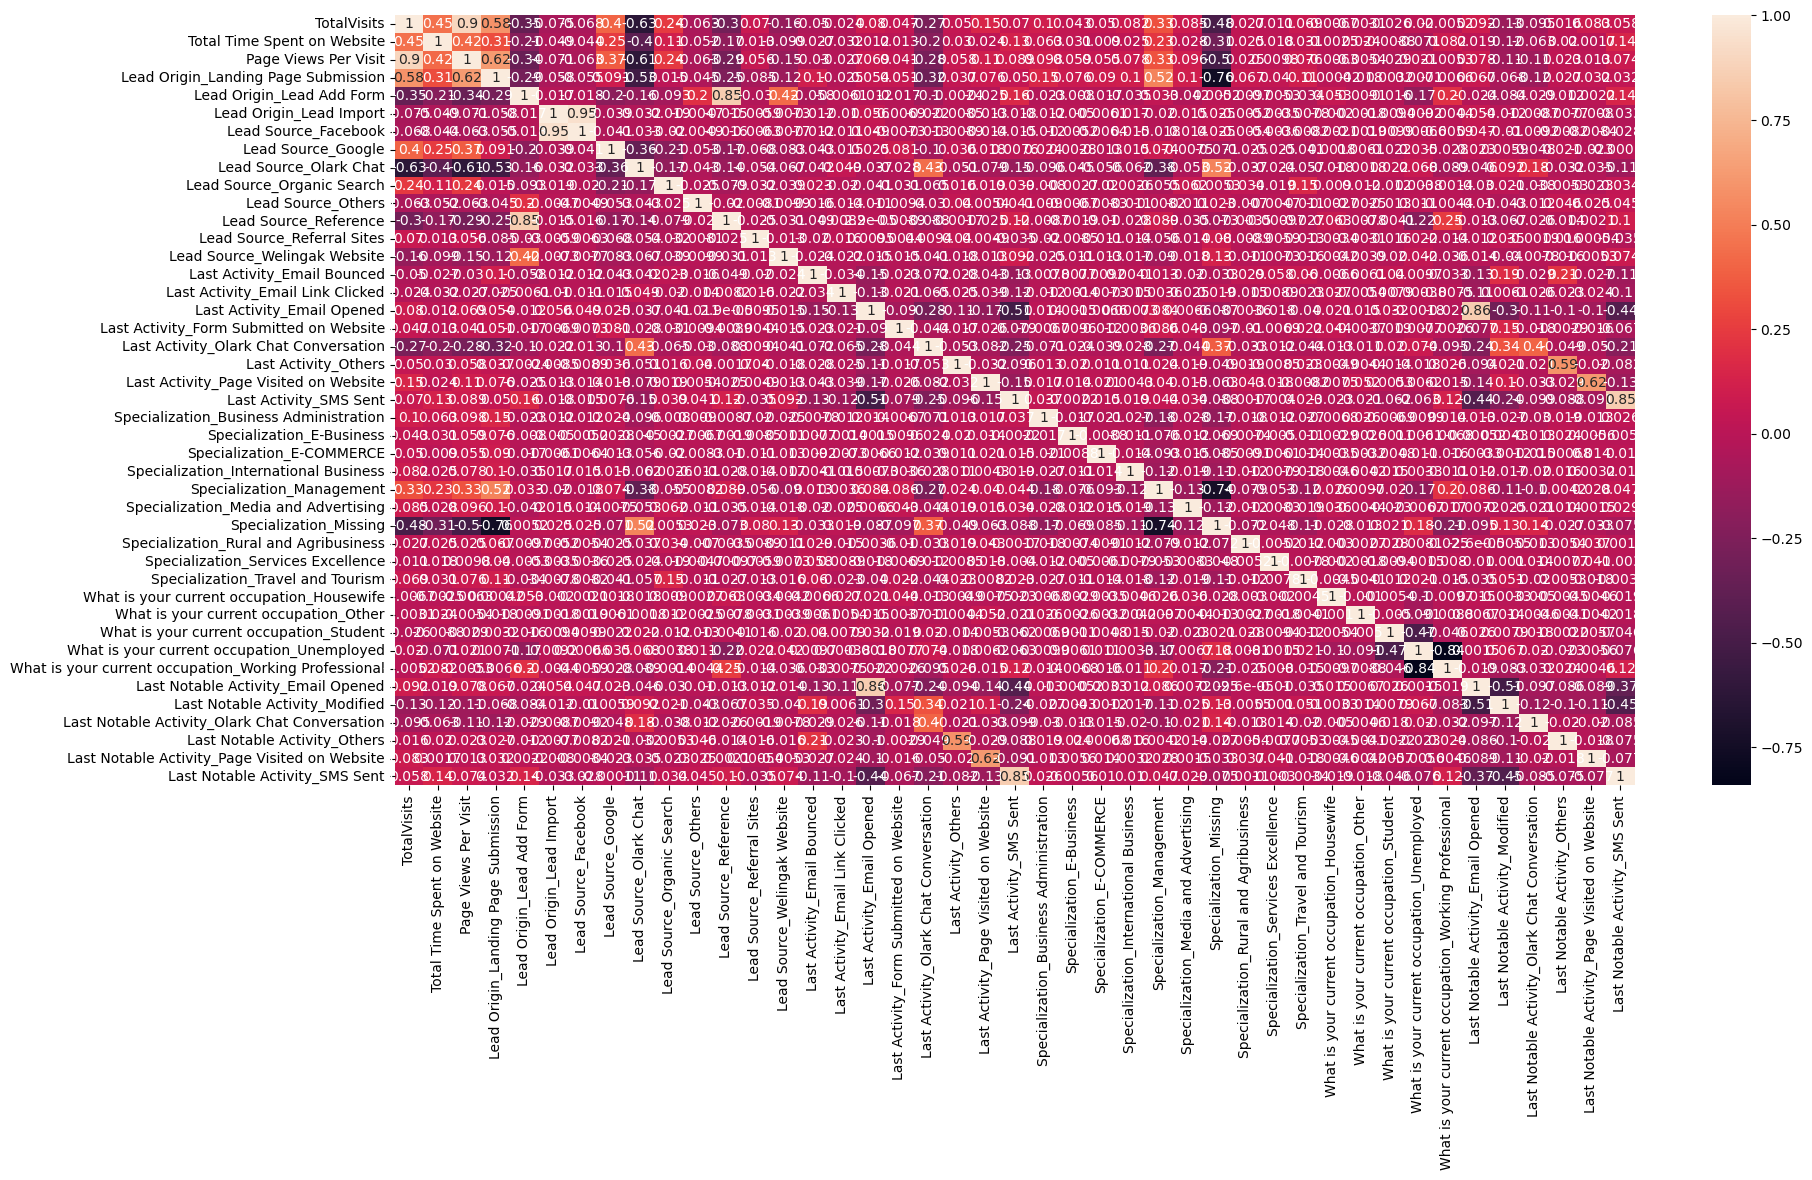

In [116]:
# correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [117]:
import statsmodels.api as sm

In [118]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5231
Model:                            GLM   Df Residuals:                     5187
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2056.2
Date:                Sun, 18 Aug 2024   Deviance:                       4112.5
Time:                        12:05:42   Pearson chi2:                 5.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4154
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7228      1.607     -0.450      0.653      -3.872       2.426
TotalVisits                                              0.1788      0.095      1.882      0.060      -0.007       0.365
Total Time Spent on Website                              1.0750      0.046     23.384      0.000       0.985       1.165
Page Views Per Visit                                    -0.1975      0.090     -2.204      0.028      -0.373      -0.022
Lead Origin_Landing Page Submission                     -1.1274      0.166     -6.790      0.000      -1.453      -0.802
Lead Origin_Lead Add Form                                2.8053      1.046      2.682      0.007       0.756       4.855
Lead Origin_Lead Import                                 -0.3213      1.547     -0.208      0.835      -3.353       2.710
Lead Source_Facebook                                     1.2758      1.427      0.894      0.371      -1.521       4.072
Lead Source_Google                                       0.2091      0.115      1.825      0.068      -0.015       0.434
Lead Source_Olark Chat                                   1.3154      0.187      7.037      0.000       0.949       1.682
Lead Source_Organic Search                               0.1871      0.166      1.127      0.260      -0.138       0.513
Lead Source_Others                                       0.5372      0.846      0.635      0.526      -1.121       2.196
Lead Source_Reference                                    0.6238      1.065      0.586      0.558      -1.464       2.711
Lead Source_Referral Sites                              -0.0989      0.430     -0.230      0.818      -0.941       0.743
Lead Source_Welingak Website                             3.6728      1.460      2.516      0.012       0.811       6.534
Last Activity_Email Bounced                             -1.9890      0.540     -3.681      0.000      -3.048      -0.930
Last Activity_Email Link Clicked                         0.7638      0.409      1.869      0.062      -0.037       1.565
Last Activity_Email Opened                               0.9035      0.255      3.537      0.000       0.403       1.404
Last Activity_Form Submitted on Website                 -0.4596      0.448     -1.027      0.305      -1.337       0.418
Last Activity_Olark Chat Conversation                   -0.7248      0.295     -2.459      0.014      -1.303      -0.147
Last Activity_Others                                     0.8342      0.427      1.954      0.051      -0.003       1.671
Last Activity_Page Visited on Website                    0.2053      0.337      0.610      0.542      -0.455       0.865
Last Activity_SMS Sent                                   0

### Feature Selection Using RFE

### Importing libraries for Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [120]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [121]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True])

In [122]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', False, 12),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 4),
 ('Last Activity_Page Visited on Website', False, 22),
 ('Last Activity_SMS Sent', False, 3),
 ('Specialization_Business Administration', False, 15),
 ('Speci

In [123]:
col = X_train.columns[rfe.support_] # passing the columns to a variable

In [124]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity

### Assessing the model with StatsModels

#### Model 1

In [125]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5231
Model:                            GLM   Df Residuals:                     5215
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2093.5
Date:                Sun, 18 Aug 2024   Deviance:                       4187.0
Time:                        12:05:43   Pearson chi2:                 5.44e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4462      1.486      0.300      0.764      -2.466       3.358
Total Time Spent on Website                              1.0704      0.045     23.837      0.000       0.982       1.158
Lead Origin_Landing Page Submission                     -1.2168      0.148     -8.224      0.000      -1.507      -0.927
Lead Origin_Lead Add Form                                3.3338      0.236     14.124      0.000       2.871       3.796
Lead Source_Olark Chat                                   1.1837      0.132      8.945      0.000       0.924       1.443
Lead Source_Welingak Website                             2.9894      1.037      2.883      0.004       0.957       5.022
Last Activity_Email Bounced                             -2.7729      0.484     -5.735      0.000      -3.721      -1.825
Last Activity_Olark Chat Conversation                   -1.6521      0.190     -8.714      0.000      -2.024      -1.281
Specialization_Missing                                  -1.1142      0.140     -7.955      0.000      -1.389      -0.840
What is your current occupation_Housewife               22.2501    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                   -1.6258      1.809     -0.899      0.369      -5.171       1.919
What is your current occupation_Student                 -0.7926      1.502     -0.528      0.598      -3.736       2.151
What is your current occupation_Unemployed              -0.9688      1.483     -0.653      0.514      -3.875       1.938
What is your current occupation_Working Professional     1.7925      1.497      1.197      0.231      -1.142       4.727
Last Notable Activity_Others                             0.9635      0.311      3.094      0.002       0.353       1.574
Last Notable Activity_SMS Sent                           1.6754      0.088     19.050      0.000       1.503       1.848
========================================================================================================================
"""

In [126]:
#Dropping column with high P Value

col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Missing',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 2

##### After dropping 'What is your current occupation_Housewife' 

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5231
Model:                            GLM   Df Residuals:                     5216
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.0
Date:                Sun, 18 Aug 2024   Deviance:                       4190.0
Time:                        12:05:43   Pearson chi2:                 5.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2770      1.210      1.882      0.060      -0.094       4.648
Total Time Spent on Website                              1.0689      0.045     23.821      0.000       0.981       1.157
Lead Origin_Landing Page Submission                     -1.2099      0.148     -8.185      0.000      -1.500      -0.920
Lead Origin_Lead Add Form                                3.3325      0.236     14.122      0.000       2.870       3.795
Lead Source_Olark Chat                                   1.1801      0.132      8.922      0.000       0.921       1.439
Lead Source_Welingak Website                             2.9883      1.037      2.882      0.004       0.956       5.021
Last Activity_Email Bounced                             -2.7714      0.483     -5.735      0.000      -3.718      -1.824
Last Activity_Olark Chat Conversation                   -1.6654      0.190     -8.753      0.000      -2.038      -1.292
Specialization_Missing                                  -1.1071      0.140     -7.910      0.000      -1.381      -0.833
What is your current occupation_Other                   -3.4564      1.590     -2.174      0.030      -6.573      -0.340
What is your current occupation_Student                 -2.6271      1.228     -2.139      0.032      -5.035      -0.219
What is your current occupation_Unemployed              -2.8036      1.205     -2.326      0.020      -5.166      -0.441
What is your current occupation_Working Professional    -0.0429      1.222     -0.035      0.972      -2.439       2.353
Last Notable Activity_Others                             0.9564      0.312      3.066      0.002       0.345       1.568
Last Notable Activity_SMS Sent                           1.6735      0.088     19.039      0.000       1.501       1.846
========================================================================================================================
"""

In [128]:
#Dropping column with high P Value

col = col.drop('What is your current occupation_Working Professional', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Missing',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 3

##### After dropping 'What is your current occupation_Working Professional'

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5231
Model:                            GLM   Df Residuals:                     5217
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.0
Date:                Sun, 18 Aug 2024   Deviance:                       4190.0
Time:                        12:05:43   Pearson chi2:                 5.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.2354      0.245      9.123      0.000       1.755       2.716
Total Time Spent on Website                    1.0689      0.045     23.821      0.000       0.981       1.157
Lead Origin_Landing Page Submission           -1.2099      0.148     -8.185      0.000      -1.500      -0.920
Lead Origin_Lead Add Form                      3.3325      0.236     14.122      0.000       2.870       3.795
Lead Source_Olark Chat                         1.1801      0.132      8.922      0.000       0.921       1.439
Lead Source_Welingak Website                   2.9883      1.037      2.882      0.004       0.956       5.021
Last Activity_Email Bounced                   -2.7717      0.483     -5.736      0.000      -3.719      -1.825
Last Activity_Olark Chat Conversation         -1.6651      0.190     -8.758      0.000      -2.038      -1.292
Specialization_Missing                        -1.1072      0.140     -7.912      0.000      -1.381      -0.833
What is your current occupation_Other         -3.4149      1.060     -3.221      0.001      -5.493      -1.337
What is your current occupation_Student       -2.5855      0.320     -8.077      0.000      -3.213      -1.958
What is your current occupation_Unemployed    -2.7620      0.213    -12.939      0.000      -3.180      -2.344
Last Notable Activity_Others                   0.9564      0.312      3.066      0.002       0.345       1.568
Last Notable Activity_SMS Sent                 1.6735      0.088     19.039      0.000       1.501       1.846
==============================================================================================================
"""

In [130]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1118    0.125934
5588    0.886661
6849    0.047251
4934    0.963845
6340    0.047251
7280    0.096859
1534    0.806391
6251    0.207714
8755    0.689689
4957    0.985283
dtype: float64

In [131]:
# converting to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12593398, 0.88666104, 0.04725096, 0.96384517, 0.04725096,
       0.09685917, 0.80639075, 0.20771375, 0.68968869, 0.98528294])

In [132]:
# Converting into a data frame

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.125934,1118
1,1,0.886661,5588
2,0,0.047251,6849
3,1,0.963845,4934
4,0,0.047251,6340


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.125934,1118,0
1,1,0.886661,5588,1
2,0,0.047251,6849,0
3,1,0.963845,4934,1
4,0,0.047251,6340,0


### Importing libarary for Confusion Metrics

In [134]:
from sklearn import metrics

In [135]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2913  357]
 [ 579 1382]]


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8210667176448098


### VIF - Variance Inflation Factor

In [137]:
#Checking VIF for correlation between variables

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,8.33
1,Lead Origin_Landing Page Submission,4.88
7,Specialization_Missing,4.46
3,Lead Source_Olark Chat,2.33
2,Lead Origin_Lead Add Form,1.55
6,Last Activity_Olark Chat Conversation,1.51
12,Last Notable Activity_SMS Sent,1.43
0,Total Time Spent on Website,1.32
4,Lead Source_Welingak Website,1.27
9,What is your current occupation_Student,1.23


'What is your current occupation_Unemployed' is the variable that has high VIF. Hence dropping the variable

In [140]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Missing',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [141]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5231
Model:                            GLM   Df Residuals:                     5218
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2216.0
Date:                Sun, 18 Aug 2024   Deviance:                       4432.0
Time:                        12:05:43   Pearson chi2:                 5.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.1226      0.135     -0.905      0.366      -0.388       0.143
Total Time Spent on Website                 1.0704      0.044     24.514      0.000       0.985       1.156
Lead Origin_Landing Page Submission        -1.4011      0.141     -9.912      0.000      -1.678      -1.124
Lead Origin_Lead Add Form                   3.3964      0.231     14.679      0.000       2.943       3.850
Lead Source_Olark Chat                      1.1827      0.130      9.121      0.000       0.929       1.437
Lead Source_Welingak Website                2.8836      1.037      2.781      0.005       0.852       4.916
Last Activity_Email Bounced                -2.4941      0.444     -5.623      0.000      -3.363      -1.625
Last Activity_Olark Chat Conversation      -1.6594      0.186     -8.916      0.000      -2.024      -1.295
Specialization_Missing                     -1.4823      0.135    -10.966      0.000      -1.747      -1.217
What is your current occupation_Other      -0.9915      1.058     -0.937      0.349      -3.065       1.082
What is your current occupation_Student     0.0038      0.250      0.015      0.988      -0.486       0.493
Last Notable Activity_Others                1.0089      0.296      3.412      0.001       0.429       1.589
Last Notable Activity_SMS Sent              1.6596      0.085     19.433      0.000       1.492       1.827
===========================================================================================================
"""

In [142]:
#Dropping 'What is your current occupation_Student' due to high P value

col = col.drop('What is your current occupation_Student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Missing',
       'What is your current occupation_Other', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [143]:
# Rerunning the model after dropping 'What is your current occupation_Student'

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.18
7,Specialization_Missing,2.13
6,Last Activity_Olark Chat Conversation,1.51
10,Last Notable Activity_SMS Sent,1.43
2,Lead Origin_Lead Add Form,1.41
0,Total Time Spent on Website,1.32
1,Lead Origin_Landing Page Submission,1.30
4,Lead Source_Welingak Website,1.27
5,Last Activity_Email Bounced,1.12
9,Last Notable Activity_Others,1.07


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [145]:
# Rechecking confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2913,  357],
       [ 579, 1382]])

In [146]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8210667176448098

## Metrics beyond simply accuracy

In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.704742478327384

In [149]:
# Calculating specificity
TN / float(TN+FP)

0.8908256880733945

In [150]:
# Calculate false postive rate - predicting Converted when customer is not Converted
print(FP/ float(TN+FP))

0.10917431192660551


In [151]:
# positive predictive value 
print (TP / float(TP+FP))

0.7947096032202415


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.834192439862543


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [153]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

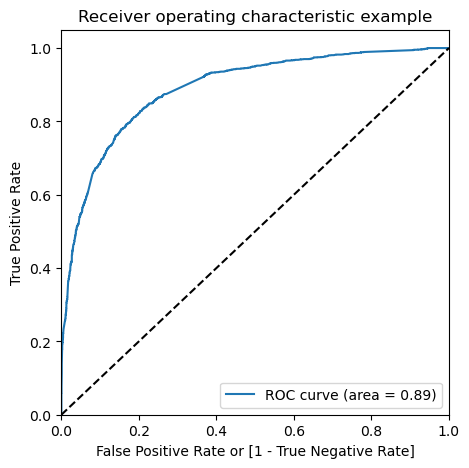

In [155]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [156]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.125934,1118,0,1,1,0,0,0,0,0,0,0,0
1,1,0.886661,5588,1,1,1,1,1,1,1,1,1,1,0
2,0,0.047251,6849,0,1,0,0,0,0,0,0,0,0,0
3,1,0.963845,4934,1,1,1,1,1,1,1,1,1,1,1
4,0,0.047251,6340,0,1,0,0,0,0,0,0,0,0,0


In [157]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374881  1.000000  0.000000
0.1   0.1  0.627987  0.963284  0.426911
0.2   0.2  0.740394  0.922998  0.630887
0.3   0.3  0.802523  0.843447  0.777982
0.4   0.4  0.820493  0.776135  0.847095
0.5   0.5  0.821067  0.704742  0.890826
0.6   0.6  0.808258  0.596634  0.935168
0.7   0.7  0.792965  0.519123  0.957187
0.8   0.8  0.773657  0.442631  0.972171
0.9   0.9  0.723762  0.284039  0.987462


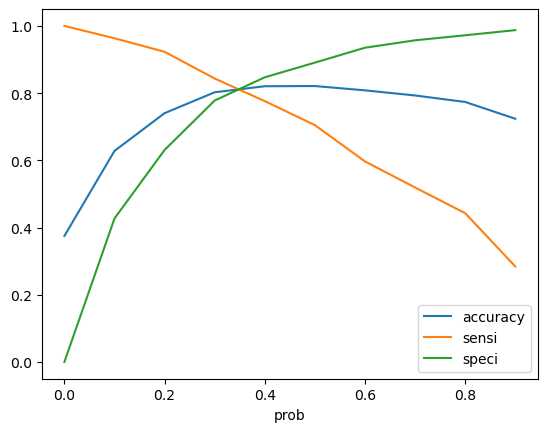

In [158]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [159]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.125934,1118,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.886661,5588,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.047251,6849,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.963845,4934,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.047251,6340,0,1,0,0,0,0,0,0,0,0,0,0


In [160]:
# Overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8025234180844962

In [161]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2544,  726],
       [ 307, 1654]])

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.8434472208057113

In [164]:
# Calculate specificity

TN / float(TN+FP)

0.7779816513761468

In [165]:
# Calculate false postive rate - predicting Converted when customer is not Converted
print(FP/ float(TN+FP))

0.22201834862385322


In [166]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6949579831932773


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8923184847421958


## Precision and Recall

In [168]:
#Looking at the confusion matrix again

In [169]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2913,  357],
       [ 579, 1382]])

##### Precision
TP / TP + FP

In [170]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7947096032202415

##### Recall
TP / TP + FN

In [171]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.704742478327384

### Using sklearn utilities for the same

In [172]:
from sklearn.metrics import precision_score, recall_score

In [173]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7947096032202415

In [174]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.704742478327384

### Precision and recall tradeoff

In [175]:
from sklearn.metrics import precision_recall_curve

In [176]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       1
 4       0
 5       0
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      1
 15      1
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      0
 25      1
 26      0
 27      0
 28      0
 29      0
 30      0
 31      0
 32      0
 33      1
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      1
 41      0
 42      0
 43      0
 44      0
 45      1
 46      0
 47      1
 48      0
 49      0
 50      0
 51      0
 52      1
 53      0
 54      0
 55      1
 56      1
 57      1
 58      0
 59      0
 60      1
 61      1
 62      0
 63      1
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      0
 71      1
 72      0
 73      0
 74      0
 75      1
 76      0
 77      0
 78      0
 79      0
 80      0
 81      1
 82      0
 83      1
 84      0
 85      0
 86      1
 87      0
 88      0
 89      0
 90      0

In [177]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

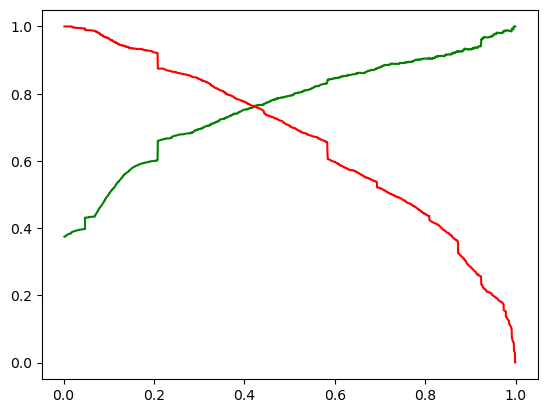

In [178]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Final Analysis On Training Dataset
- Our model seems to be performing very well as our ROC curve has a value of 0.89 which is extremely good.

- Some important statistics of our model:
    - Accuracy --> 80.25
    - Sensitivity --> 84.34
    - Specificity --> 77.79
    - Precision --> 79.47
    - Recall --> 70.47

### Making predictions on the test set

#### Rescaling Test Dataset

In [179]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8741,1.663541,0.231952,0.406451,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
675,1.075648,-0.150612,1.376472,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3078,-1.275921,-0.828032,-1.210251,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2186,1.075648,0.605186,1.376472,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
566,0.487756,-0.376419,0.729791,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [180]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

In [181]:
# Defining test data set

X_test = X_test[X_train_sm.columns]               
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Missing,What is your current occupation_Other,What is your current occupation_Student,Last Notable Activity_Others,Last Notable Activity_SMS Sent
8741,0.231952,1,0,0,0,0,0,0,0,0,0,1
675,-0.150612,1,0,0,0,0,0,0,0,0,0,0
3078,-0.828032,0,1,0,0,0,0,0,0,0,0,1
2186,0.605186,1,0,0,0,0,0,0,0,0,0,0
566,-0.376419,1,0,0,0,0,0,0,0,0,0,0


In [182]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [183]:
y_test_pred = res.predict(X_test_sm)


In [184]:
y_test_pred[:10]

8741    0.594886
675     0.156451
3078    0.982826
2186    0.294042
566     0.127128
2750    0.212739
530     0.154876
4026    0.379413
3960    0.212739
8456    0.093176
dtype: float64

In [185]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [186]:
# Top 5 rows

y_pred_1.head()

,0
8741,0.594886
675,0.156451
3078,0.982826
2186,0.294042
566,0.127128


In [187]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [188]:
# Putting Lead Number to index

y_test_df['Lead Number'] = y_test_df.index

In [189]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [191]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,8741,0.594886
1,1,675,0.156451
2,1,3078,0.982826
3,0,2186,0.294042
4,0,566,0.127128


In [192]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [193]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [194]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,8741,0,0.594886
1,675,1,0.156451
2,3078,1,0.982826
3,2186,0,0.294042
4,566,0,0.127128


In [195]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [196]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,8741,0,0.594886,1
1,675,1,0.156451,0
2,3078,1,0.982826,1
3,2186,0,0.294042,0
4,566,0,0.127128,0


In [197]:
# Checking Overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.792149866190901

In [198]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1179,  261],
       [ 205,  597]])

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Sensitivity of logistic regression model
TP / float(TP+FN)

0.7443890274314214

In [201]:
# Calculating Specificity
TN / float(TN+FP)

0.81875

In [204]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6958041958041958

In [205]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7443890274314214

###  Final Analysis On Test Dataset
- Upon running the trained model on the test dataset we obtain the following figures:
    - Accuracy --> 79.21
    - Sensitivity --> 74.43
    - Specificity --> 81.87
    - Precision --> 69.58
    - Recall --> 74.43

## Conclusion

### Variables to be focussed on for bettering the lead conversion ratio:

- Lead Source_Olark Chat
- Specialization_Missing
- Last Activity_Olark Chat Conversation
- Last Notable Activity_SMS Sent
- Lead Origin_Lead Add Form
- Total Time Spent on Website
- Lead Origin_Landing Page Submission
- Lead Source_Welingak Website
- Last Activity_Email Bounced
- Last Notable Activity_Others
- What is your current occupation_Other

### Comparing the values obtained by our Train and Test dataset:

- Train Dataset
    - Accuracy --> 80.25
    - Sensitivity --> 84.34
    - Specificity --> 77.79
    - Precision --> 79.47
    - Recall --> 70.47
     
- Test Dataset
    - Accuracy --> 79.21
    - Sensitivity --> 74.43
    - Specificity --> 81.87
    - Precision --> 69.58
    - Recall --> 74.43